In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn import linear_model

In [2]:
data = pd.read_csv('googleplaystore.csv')
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
#Dropping 3 attributes (Android Ver, Last Updated, Current Ver)
data = data.drop(['Android Ver','Last Updated','Current Ver'], axis=1)

In [4]:
#Drop the duplicate rows having same app names
data.drop_duplicates(subset='App', keep='first', inplace=True)

In [5]:
#remove data with 0 reviews, 0 installs or null ratings
data.dropna(subset=['Reviews', 'Rating', 'Installs','Content Rating'], inplace=True)

In [6]:
#Displaying Unique Categories of Apps
print( len(data['Category'].unique()) , "categories")

print("\n", data['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [7]:
#Displaying Unique Genres of Apps
print( len(data['Genres'].unique()) , "allGenres")

print("\n", data['Genres'].unique())

114 allGenres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educ

In [8]:
data['Genres'] = [i.split(';')[0] for i in data['Genres']]
data['Genres']

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10834            Education
10836            Education
10837            Education
10839    Books & Reference
10840            Lifestyle
Name: Genres, Length: 8196, dtype: object

In [9]:
# Remove the + from Installs and make it purely a number
data['Installs'] = [i[:-1].replace(',','') for i in data['Installs']]
data = data[data['Installs'] != '']
data['Installs'] = [int(i) for i in data['Installs']]

In [10]:
#Convert Kb to Mb and remove the text and convert the column to float
for i,row in data.iterrows():
    if 'M' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)*1000
    elif 'k' in row['Size']:
        x = row['Size'][:-1]
        y = float(x)
    else:
        y = 0
    data.at[i, 'Size'] = y
data['Size'] = data['Size'].astype(float)

In [11]:
#verify whether the above snippet of code worked
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8196 non-null   object 
 1   Category        8196 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         8196 non-null   object 
 4   Size            8196 non-null   float64
 5   Installs        8196 non-null   int64  
 6   Type            8196 non-null   object 
 7   Price           8196 non-null   object 
 8   Content Rating  8196 non-null   object 
 9   Genres          8196 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [12]:
#Drop Null Values from Size
data.dropna(subset=['Size'], inplace=True)

In [13]:
# Converting Category categorical values into numerical values
categoryValues = data["Category"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Category_n"] = data["Category"].map(category_dict).astype(int)
data["Category_n"]

0         0
1         0
2         0
3         0
4         0
         ..
10834    18
10836    18
10837    18
10839     3
10840    16
Name: Category_n, Length: 8196, dtype: int32

In [14]:
#Resetting Index after dropping Null Values
data.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design,0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8191,10834,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0,Everyone,Education,18
8192,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0,Everyone,Education,18
8193,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0,Everyone,Education,18
8194,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0,Mature 17+,Books & Reference,3


In [15]:
# Converting Content Rating categorical values into numerical values
categoryValues = data["Content Rating"].unique()
category_dict = {}
for i in range(len(categoryValues)):
    category_dict[categoryValues[i]] = i
data["Content Rating_n"] = data["Content Rating"].map(category_dict).astype(int)
data["Content Rating_n"]

0        0
1        0
2        0
3        1
4        0
        ..
10834    0
10836    0
10837    0
10839    3
10840    0
Name: Content Rating_n, Length: 8196, dtype: int32

In [16]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_n,Content Rating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,0,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design,0,0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0,Everyone,Art & Design,0,0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0,Everyone,Art & Design,0,0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0,Everyone,Art & Design,0,0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0,Everyone,Art & Design,0,0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0,Everyone,Art & Design,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   object 
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   object 
 7   Price             8196 non-null   object 
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 768.4+ KB


In [18]:
#Remove the dollar sign from the Price and convert the column to float
for i,row in data.iterrows():
    if row['Price'] == '0':
        data.at[i,'Price'] = 0
    else:
        data.at[i,'Price'] = row['Price'][1:]
data['Price'] = data['Price'].astype(float)

In [19]:
#Verify whether the above snippet of code worked as expected
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   object 
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   object 
 7   Price             8196 non-null   float64
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 1.1+ MB


In [20]:
data['Reviews'] = data['Reviews'].astype(int)

In [21]:
#Convert Type which is either Free or Paid to 0 or 1 for Linear Regression.
for i,row in data.iterrows():
    if row['Type'] == 'Free':
        data.at[i,'Type'] = 0
    else:
        data.at[i,'Type'] = 1
data['Type'] = data['Type'].astype(int)

In [22]:
#Verify whether the above snippet of code worked as expected
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               8196 non-null   object 
 1   Category          8196 non-null   object 
 2   Rating            8196 non-null   float64
 3   Reviews           8196 non-null   int32  
 4   Size              8196 non-null   float64
 5   Installs          8196 non-null   int64  
 6   Type              8196 non-null   int32  
 7   Price             8196 non-null   float64
 8   Content Rating    8196 non-null   object 
 9   Genres            8196 non-null   object 
 10  Category_n        8196 non-null   int32  
 11  Content Rating_n  8196 non-null   int32  
dtypes: float64(3), int32(4), int64(1), object(4)
memory usage: 1.0+ MB


In [23]:
data = data.drop(['Content Rating'], axis=1)

In [24]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [25]:
new_data.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Category_n,Content Rating_n,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14000.0,500000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700.0,5000000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000.0,50000000,0,0.0,Art & Design,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,0,0.0,Art & Design,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Genres'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=0)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [28]:
model = linear_model.LinearRegression().fit(X = x_train_scaled, y = y_train)

score_train = model.score(X = x_train_scaled, y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled, y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled)
print([score_train, score_val])

[0.03216547057713348, 0.028527835350903197]


In [29]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

Mean Squared Error: 0.25905451427458615
Mean absolute Error: 0.3673239450461272
Mean squared Log Error: 0.012665239959618081


In [30]:
X.head(5)

,Reviews,Size,Installs,Type,Price,Content Rating_n,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,159,19000.0,10000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,967,14000.0,500000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,87510,8700.0,5000000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,215644,25000.0,50000000,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,967,2800.0,100000,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
model = linear_model.LinearRegression().fit(X = x_train_scaled[:,[0,1,2]], y = y_train)

score_train = model.score(X = x_train_scaled[:,[0,1,2]], y = y_train) # R squared (training)
score_val = model.score(X = x_test_scaled[:,[0,1,2]], y = y_test) # R squared (validation)
Results = model.predict(x_test_scaled[:,[0,1,2]])
print([score_train, score_val])

[0.004054899404321577, 0.004501381964375328]


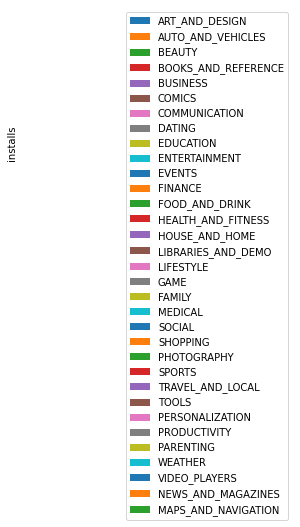

In [32]:
# Pie chart for the number of installs against category : for the most installs.

df = pd.DataFrame({'installs': data['Installs'],
                   'category': data['Category'].unique()},
                  index= data['Category'].unique())
plot = df.plot.pie(normalize = False,y='installs', figsize=(5, 5))

KeyError: 0

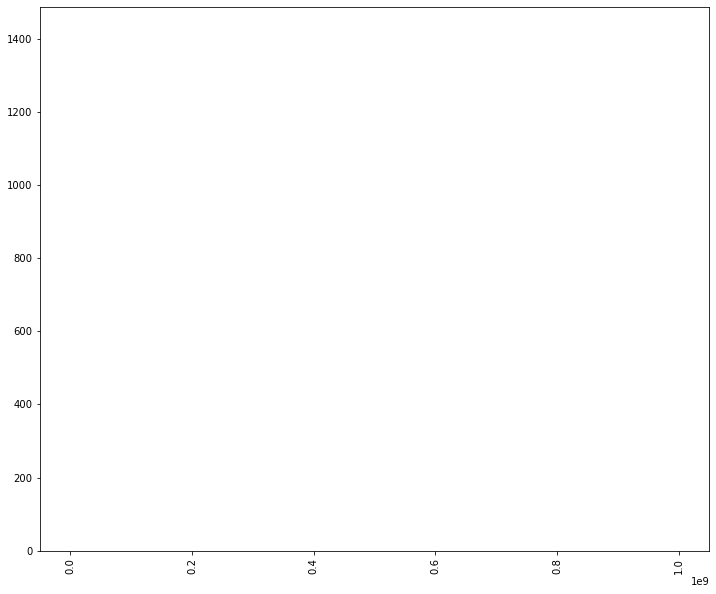

In [33]:
#Plotting installs against how many such apps:

plt.figure(figsize = (12,10))
plt.bar(data['Installs'].value_counts().index.tolist(),data['Installs'].value_counts(), color = "blue")
plt.xticks(rotation=90)
for i in range(len(data['Installs'].value_counts())):
    txt = f"{data['Installs'].value_counts()[i]}"
plt.xlabel("Installs",size = 15, color = "black")
plt.ylabel("count",size = 15, color = "black")
plt.title("Installs",size = 20, color = "black")
plt.show()

In [ ]:
data.head()

In [ ]:
for i,row in data.iterrows():
    data.at[i,'Rating'] = round(row['Rating']*2)/2

In [ ]:
new_data = pd.get_dummies(data, columns=['Category'], drop_first="True")

In [ ]:
# Running linear regression on dummy variables
X = new_data.drop(labels = ['App','Category_n','Rating','Size','Genres','Installs'],axis = 1)
y = new_data.Rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train_scaled,y_train)
model.score(X = x_train_scaled, y = y_train)

In [ ]:
Results = model.predict(x_test_scaled)
Results

In [ ]:
corr_coef = np.corrcoef(Results, y_test)[1,0]
R_squared = (corr_coef)**2
print(R_squared)

In [ ]:
print ('Mean Squared Error: '+ str(metrics.mean_squared_error(y_test,Results)))
print ('Mean absolute Error: '+ str(metrics.mean_absolute_error(y_test,Results)))
print ('Mean squared Log Error: '+ str(metrics.mean_squared_log_error(y_test,Results)))

In [ ]:
# EDA : Plots for exploration

#Distribution of rating : 

g = sns.kdeplot(data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

***The rating seems to be concentrated around 4.3***

In [ ]:
#Count of apps in each category

g = sns.countplot(x="Category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

In [ ]:
#Rating vs Reviews

plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'green',data=data[data['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [ ]:
reviews_data = pd.read_csv('googleplaystore_user_reviews.csv')
reviews_data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
import re
import warnings
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

warnings.filterwarnings('ignore')

In [ ]:
reviews_data.info()

In [ ]:
data.info()

In [ ]:
merged_data = pd.merge(data, reviews_data, how='right')
merged_data

## Now we will perform sentiment analysis on the merged data

In [ ]:
merged_data = merged_data.dropna()
merged_data.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity','Genres'],axis=1,inplace=True)
merged_data

In [ ]:
sentiment_data = merged_data[['Translated_Review','Sentiment']]
sentiment_data

### Converting the case of reviews to lower

In [ ]:

sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].str.lower()
sentiment_data

### Removing punctuation and special characters


In [ ]:
import re
sentiment_data['Translated_Review'] = [re.sub(r'[^A-Za-z0-9 ]+', '', i) for i in sentiment_data['Translated_Review']]
sentiment_data.head(10)

### Remove stop words from the reviews data

In [ ]:
import nltk
nltk.download('stopwords')
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x not in stopwords.words('english')))

In [ ]:
sentiment_data

### Remove numbers from the data

In [ ]:
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x : ' '.join(x for x in x.split() if x.isdigit()==False))
sentiment_data

### Stemming every word in review text

In [ ]:
st = PorterStemmer()
sentiment_data['Translated_Review'] = sentiment_data['Translated_Review'].apply(lambda x: " ".join(st.stem(word) for word in x.split()))
sentiment_data.head()

In [ ]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(sentiment_data['Translated_Review']).toarray()

### Splitting the data into training and test data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(processed_features,sentiment_data['Sentiment'],test_size = 0.25)

### Running logistic regression model to predict the sentiment of the reviews

In [ ]:
lr = linear_model.LogisticRegression()
model = lr.fit(x_train,y_train)

In [ ]:
Results = model.predict(x_test)

In [ ]:
model.score(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,Results),annot=True,fmt = '.5g', cmap = plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])
plt.yticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])

In [ ]:
sentiment_data['tokens'] = sentiment_data['Translated_Review'].apply(lambda x: x.split())
sentiment_data

In [ ]:
for i,row in sentiment_data.iterrows():
    if(row['Sentiment'] == 'Positive'):
        sentiment_data.at[i, 'Sentiment'] = 1
    else:
        sentiment_data.at[i, 'Sentiment'] = 0
sentiment_data

### Building a wordcloud to show of positive words in the reviews

In [ ]:
from wordcloud import WordCloud
list_words_positive = []
for index, row in sentiment_data.iterrows():
    if row['Sentiment'] == 1:
        list_words_positive.extend(row['tokens'])
all_words = ' '.join(list_words_positive)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Building a wordcloud to show of negative words in the reviews

In [ ]:
list_words_negative = []
for index, row in sentiment_data.iterrows():
    if row['Sentiment'] == 0:
        list_words_negative.extend(row['tokens'])
all_words = ' '.join(list_words_negative)
wordcloud = WordCloud(width = 800, height = 500).generate(all_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()